# Regression Exercise 

California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

 It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.
 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

## The Data

** Import the cal_housing_clean.csv file with pandas. Separate it into a training (70%) and testing set(30%).**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
housing = pd.read_csv('cal_housing_clean.csv')
housing = housing[housing.medianHouseValue<480000]
features = ['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']
housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [3]:
X = housing.drop('medianHouseValue', axis = 1)
y = housing['medianHouseValue']

In [4]:
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

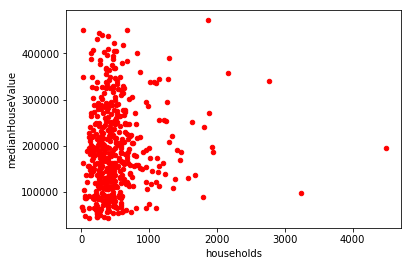

In [5]:
housing.sample(500).plot(kind = 'scatter', x = 'households', y = 'medianHouseValue' , color = 'red')

### Scale the Feature Data

** Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns,
                      index = X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns,
                     index = X_test.index)

### Create Feature Columns

** Create the necessary tf.feature_column objects for the estimator. They should all be trated as continuous numeric_columns. **

In [7]:
feat_cols = []

for feature in features:
    feat_cols.append(tf.feature_column.numeric_column(feature))

** Create the input function for the estimator object. (play around with batch_size and num_epochs)**

In [8]:
input_func = tf.estimator.inputs.pandas_input_fn(\
                                                 x = X_train, y = y_train,\
                                                batch_size =10,\
                                                num_epochs = 2000,\
                                                shuffle = True)
# for training section, we will use shuffle == true to assure we randomly
# select inputs

** Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

In [9]:
model = tf.estimator.DNNRegressor(feature_columns=feat_cols, hidden_units = [6,10,10,10,10])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_model_dir': 'C:\\Users\\Amin\\AppData\\Local\\Temp\\tmpbgz51f5w', '_global_id_in_cluster': 0, '_log_step_count_steps': 100, '_num_worker_replicas': 1, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025E6CA02710>, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_service': None, '_is_chief': True, '_evaluation_master': '', '_num_ps_replicas': 0, '_save_checkpoints_steps': None}


##### ** Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement) **

In [10]:
model.train(input_fn =input_func, steps = 400000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Amin\AppData\Local\Temp\tmpbgz51f5w\model.ckpt.
INFO:tensorflow:loss = 393417720000.0, step = 1
INFO:tensorflow:global_step/sec: 103.163
INFO:tensorflow:loss = 119509560000.0, step = 101 (0.975 sec)
INFO:tensorflow:global_step/sec: 137.548
INFO:tensorflow:loss = 89001290000.0, step = 201 (0.727 sec)
INFO:tensorflow:global_step/sec: 110.354
INFO:tensorflow:loss = 26063750000.0, step = 301 (0.904 sec)
INFO:tensorflow:global_step/sec: 119.677
INFO:tensorflow:loss = 42484232000.0, step = 401 (0.856 sec)
INFO:tensorflow:global_step/sec: 145.647
INFO:tensorflow:loss = 48924037000.0, step = 501 (0.667 sec)
INFO:tensorflow:global_step/sec: 144.939
INFO:tensorflow:loss = 71633010000.0, step = 601 (0.693 sec)

INFO:tensorflow:global_step/sec: 136.43
INFO:tensorflow:loss = 86322430000.0, step = 7701 (0.732 sec)
INFO:tensorflow:global_step/sec: 136.227
INFO:tensorflow:loss = 44054938000.0, step = 7801 (0.738 sec)
INFO:tensorflow:global_step/sec: 142.145
INFO:tensorflow:loss = 19214090000.0, step = 7901 (0.700 sec)
INFO:tensorflow:global_step/sec: 128.648
INFO:tensorflow:loss = 23853425000.0, step = 8001 (0.782 sec)
INFO:tensorflow:global_step/sec: 112.999
INFO:tensorflow:loss = 45581820000.0, step = 8101 (0.899 sec)
INFO:tensorflow:global_step/sec: 111.672
INFO:tensorflow:loss = 34674770000.0, step = 8201 (0.881 sec)
INFO:tensorflow:global_step/sec: 137.985
INFO:tensorflow:loss = 32861932000.0, step = 8301 (0.720 sec)
INFO:tensorflow:global_step/sec: 144.885
INFO:tensorflow:loss = 73037760000.0, step = 8401 (0.691 sec)
INFO:tensorflow:global_step/sec: 135.501
INFO:tensorflow:loss = 34623250000.0, step = 8501 (0.738 sec)
INFO:tensorflow:global_step/sec: 157.854
INFO:tensorflow:loss = 8728180000

INFO:tensorflow:loss = 9861480000.0, step = 15601 (0.772 sec)
INFO:tensorflow:global_step/sec: 124.223
INFO:tensorflow:loss = 108952600000.0, step = 15701 (0.814 sec)
INFO:tensorflow:global_step/sec: 146.892
INFO:tensorflow:loss = 16542549000.0, step = 15801 (0.672 sec)
INFO:tensorflow:global_step/sec: 140.57
INFO:tensorflow:loss = 49147750000.0, step = 15901 (0.711 sec)
INFO:tensorflow:global_step/sec: 132.265
INFO:tensorflow:loss = 23072498000.0, step = 16001 (0.763 sec)
INFO:tensorflow:global_step/sec: 139.494
INFO:tensorflow:loss = 62994485000.0, step = 16101 (0.710 sec)
INFO:tensorflow:global_step/sec: 156.999
INFO:tensorflow:loss = 32878650000.0, step = 16201 (0.637 sec)
INFO:tensorflow:global_step/sec: 142.446
INFO:tensorflow:loss = 103631010000.0, step = 16301 (0.722 sec)
INFO:tensorflow:global_step/sec: 133.386
INFO:tensorflow:loss = 26338132000.0, step = 16401 (0.730 sec)
INFO:tensorflow:global_step/sec: 130.208
INFO:tensorflow:loss = 14347556000.0, step = 16501 (0.787 sec)
I

INFO:tensorflow:loss = 11209763000.0, step = 23501 (0.662 sec)
INFO:tensorflow:global_step/sec: 140.338
INFO:tensorflow:loss = 50639823000.0, step = 23601 (0.711 sec)
INFO:tensorflow:global_step/sec: 125.811
INFO:tensorflow:loss = 37351883000.0, step = 23701 (0.792 sec)
INFO:tensorflow:global_step/sec: 127.96
INFO:tensorflow:loss = 22361320000.0, step = 23801 (0.781 sec)
INFO:tensorflow:global_step/sec: 133.869
INFO:tensorflow:loss = 51355340000.0, step = 23901 (0.747 sec)
INFO:tensorflow:global_step/sec: 118.529
INFO:tensorflow:loss = 74773410000.0, step = 24001 (0.845 sec)
INFO:tensorflow:global_step/sec: 114.635
INFO:tensorflow:loss = 33956133000.0, step = 24101 (0.877 sec)
INFO:tensorflow:global_step/sec: 127.61
INFO:tensorflow:loss = 46449090000.0, step = 24201 (0.781 sec)
INFO:tensorflow:global_step/sec: 150.481
INFO:tensorflow:loss = 28305670000.0, step = 24301 (0.662 sec)
INFO:tensorflow:global_step/sec: 149.901
INFO:tensorflow:loss = 96893530000.0, step = 24401 (0.668 sec)
INF

INFO:tensorflow:loss = 18637860000.0, step = 31401 (0.772 sec)
INFO:tensorflow:global_step/sec: 135.056
INFO:tensorflow:loss = 37691720000.0, step = 31501 (0.742 sec)
INFO:tensorflow:global_step/sec: 135.663
INFO:tensorflow:loss = 28809355000.0, step = 31601 (0.735 sec)
INFO:tensorflow:global_step/sec: 140.313
INFO:tensorflow:loss = 42670522000.0, step = 31701 (0.713 sec)
INFO:tensorflow:global_step/sec: 145.136
INFO:tensorflow:loss = 53342003000.0, step = 31801 (0.689 sec)
INFO:tensorflow:global_step/sec: 145.978
INFO:tensorflow:loss = 60507630000.0, step = 31901 (0.685 sec)
INFO:tensorflow:global_step/sec: 150.697
INFO:tensorflow:loss = 38767284000.0, step = 32001 (0.664 sec)
INFO:tensorflow:global_step/sec: 155.718
INFO:tensorflow:loss = 38737113000.0, step = 32101 (0.645 sec)
INFO:tensorflow:global_step/sec: 134.4
INFO:tensorflow:loss = 24594973000.0, step = 32201 (0.742 sec)
INFO:tensorflow:global_step/sec: 147.248
INFO:tensorflow:loss = 41541140000.0, step = 32301 (0.679 sec)
INF

INFO:tensorflow:loss = 17021786000.0, step = 39301 (0.699 sec)
INFO:tensorflow:global_step/sec: 134.314
INFO:tensorflow:loss = 66504417000.0, step = 39401 (0.743 sec)
INFO:tensorflow:global_step/sec: 126.96
INFO:tensorflow:loss = 23923425000.0, step = 39501 (0.787 sec)
INFO:tensorflow:global_step/sec: 129.694
INFO:tensorflow:loss = 39897700000.0, step = 39601 (0.772 sec)
INFO:tensorflow:global_step/sec: 133.329
INFO:tensorflow:loss = 19700540000.0, step = 39701 (0.752 sec)
INFO:tensorflow:global_step/sec: 107.652
INFO:tensorflow:loss = 13408900000.0, step = 39801 (0.943 sec)
INFO:tensorflow:global_step/sec: 93.0728
INFO:tensorflow:loss = 63519924000.0, step = 39901 (1.054 sec)
INFO:tensorflow:global_step/sec: 244.32
INFO:tensorflow:loss = 49603523000.0, step = 40001 (0.409 sec)
INFO:tensorflow:global_step/sec: 254.196
INFO:tensorflow:loss = 15259527000.0, step = 40101 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.209
INFO:tensorflow:loss = 16883071000.0, step = 40201 (0.391 sec)
INF

INFO:tensorflow:loss = 22631168000.0, step = 47201 (0.763 sec)
INFO:tensorflow:global_step/sec: 114.06
INFO:tensorflow:loss = 49997430000.0, step = 47301 (0.885 sec)
INFO:tensorflow:global_step/sec: 159.734
INFO:tensorflow:loss = 39495480000.0, step = 47401 (0.613 sec)
INFO:tensorflow:global_step/sec: 216.591
INFO:tensorflow:loss = 61604303000.0, step = 47501 (0.462 sec)
INFO:tensorflow:global_step/sec: 214.439
INFO:tensorflow:loss = 33431996000.0, step = 47601 (0.467 sec)
INFO:tensorflow:global_step/sec: 212.487
INFO:tensorflow:loss = 41824936000.0, step = 47701 (0.469 sec)
INFO:tensorflow:global_step/sec: 224.076
INFO:tensorflow:loss = 49152115000.0, step = 47801 (0.447 sec)
INFO:tensorflow:global_step/sec: 272.372
INFO:tensorflow:loss = 131435725000.0, step = 47901 (0.367 sec)
INFO:tensorflow:global_step/sec: 131.722
INFO:tensorflow:loss = 28245178000.0, step = 48001 (0.764 sec)
INFO:tensorflow:global_step/sec: 111.771
INFO:tensorflow:loss = 20166853000.0, step = 48101 (0.896 sec)
I

INFO:tensorflow:loss = 12762472000.0, step = 55101 (0.725 sec)
INFO:tensorflow:global_step/sec: 145.453
INFO:tensorflow:loss = 58426300000.0, step = 55201 (0.691 sec)
INFO:tensorflow:global_step/sec: 118.994
INFO:tensorflow:loss = 26436090000.0, step = 55301 (0.837 sec)
INFO:tensorflow:global_step/sec: 122.364
INFO:tensorflow:loss = 21757235000.0, step = 55401 (0.822 sec)
INFO:tensorflow:global_step/sec: 126.158
INFO:tensorflow:loss = 64775270000.0, step = 55501 (0.791 sec)
INFO:tensorflow:global_step/sec: 126.399
INFO:tensorflow:loss = 45937330000.0, step = 55601 (0.790 sec)
INFO:tensorflow:global_step/sec: 158.385
INFO:tensorflow:loss = 51610853000.0, step = 55701 (0.627 sec)
INFO:tensorflow:global_step/sec: 167.774
INFO:tensorflow:loss = 53560810000.0, step = 55801 (0.598 sec)
INFO:tensorflow:global_step/sec: 157.407
INFO:tensorflow:loss = 21768760000.0, step = 55901 (0.635 sec)
INFO:tensorflow:global_step/sec: 229.65
INFO:tensorflow:loss = 10692046000.0, step = 56001 (0.434 sec)
IN

INFO:tensorflow:loss = 55631897000.0, step = 63001 (0.381 sec)
INFO:tensorflow:global_step/sec: 275.683
INFO:tensorflow:loss = 67110400000.0, step = 63101 (0.362 sec)
INFO:tensorflow:global_step/sec: 306.058
INFO:tensorflow:loss = 43955225000.0, step = 63201 (0.327 sec)
INFO:tensorflow:global_step/sec: 165.082
INFO:tensorflow:loss = 86002010000.0, step = 63301 (0.609 sec)
INFO:tensorflow:global_step/sec: 139.339
INFO:tensorflow:loss = 16174285000.0, step = 63401 (0.723 sec)
INFO:tensorflow:global_step/sec: 133.703
INFO:tensorflow:loss = 27005088000.0, step = 63501 (0.749 sec)
INFO:tensorflow:global_step/sec: 111.768
INFO:tensorflow:loss = 102522266000.0, step = 63601 (0.889 sec)
INFO:tensorflow:global_step/sec: 146.582
INFO:tensorflow:loss = 33293263000.0, step = 63701 (0.683 sec)
INFO:tensorflow:global_step/sec: 142.649
INFO:tensorflow:loss = 23436149000.0, step = 63801 (0.700 sec)
INFO:tensorflow:global_step/sec: 131.185
INFO:tensorflow:loss = 10237268000.0, step = 63901 (0.762 sec)


INFO:tensorflow:loss = 28398682000.0, step = 70901 (0.768 sec)
INFO:tensorflow:global_step/sec: 139.631
INFO:tensorflow:loss = 68487530000.0, step = 71001 (0.721 sec)
INFO:tensorflow:global_step/sec: 114.773
INFO:tensorflow:loss = 20571417000.0, step = 71101 (0.876 sec)
INFO:tensorflow:global_step/sec: 134.078
INFO:tensorflow:loss = 30140790000.0, step = 71201 (0.736 sec)
INFO:tensorflow:global_step/sec: 132.661
INFO:tensorflow:loss = 27271127000.0, step = 71301 (0.754 sec)
INFO:tensorflow:global_step/sec: 144.7
INFO:tensorflow:loss = 29614406000.0, step = 71401 (0.695 sec)
INFO:tensorflow:global_step/sec: 138.372
INFO:tensorflow:loss = 43391537000.0, step = 71501 (0.719 sec)
INFO:tensorflow:global_step/sec: 140.647
INFO:tensorflow:loss = 98185445000.0, step = 71601 (0.722 sec)
INFO:tensorflow:global_step/sec: 125.039
INFO:tensorflow:loss = 33157208000.0, step = 71701 (0.791 sec)
INFO:tensorflow:global_step/sec: 137.993
INFO:tensorflow:loss = 10534695000.0, step = 71801 (0.728 sec)
INF

INFO:tensorflow:loss = 18016522000.0, step = 78801 (0.823 sec)
INFO:tensorflow:global_step/sec: 210.819
INFO:tensorflow:loss = 158044290000.0, step = 78901 (0.450 sec)
INFO:tensorflow:global_step/sec: 201.787
INFO:tensorflow:loss = 80709040000.0, step = 79001 (0.487 sec)
INFO:tensorflow:global_step/sec: 240.491
INFO:tensorflow:loss = 18515276000.0, step = 79101 (0.416 sec)
INFO:tensorflow:global_step/sec: 222.507
INFO:tensorflow:loss = 27243278000.0, step = 79201 (0.450 sec)
INFO:tensorflow:global_step/sec: 279.895
INFO:tensorflow:loss = 27135840000.0, step = 79301 (0.357 sec)
INFO:tensorflow:global_step/sec: 241.373
INFO:tensorflow:loss = 21150610000.0, step = 79401 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.749
INFO:tensorflow:loss = 16381228000.0, step = 79501 (0.422 sec)
INFO:tensorflow:global_step/sec: 232.124
INFO:tensorflow:loss = 38036455000.0, step = 79601 (0.433 sec)
INFO:tensorflow:global_step/sec: 233.479
INFO:tensorflow:loss = 102009220000.0, step = 79701 (0.427 sec)

INFO:tensorflow:loss = 37567943000.0, step = 86701 (1.003 sec)
INFO:tensorflow:global_step/sec: 119.714
INFO:tensorflow:loss = 42695574000.0, step = 86801 (0.856 sec)
INFO:tensorflow:global_step/sec: 115.75
INFO:tensorflow:loss = 24681357000.0, step = 86901 (0.846 sec)
INFO:tensorflow:global_step/sec: 144.918
INFO:tensorflow:loss = 38684504000.0, step = 87001 (0.688 sec)
INFO:tensorflow:global_step/sec: 144.39
INFO:tensorflow:loss = 74400010000.0, step = 87101 (0.690 sec)
INFO:tensorflow:global_step/sec: 133.328
INFO:tensorflow:loss = 70388550000.0, step = 87201 (0.755 sec)
INFO:tensorflow:global_step/sec: 167.107
INFO:tensorflow:loss = 26173020000.0, step = 87301 (0.592 sec)
INFO:tensorflow:global_step/sec: 172.601
INFO:tensorflow:loss = 39980800000.0, step = 87401 (0.581 sec)
INFO:tensorflow:global_step/sec: 154.648
INFO:tensorflow:loss = 18330200000.0, step = 87501 (0.657 sec)
INFO:tensorflow:global_step/sec: 174.548
INFO:tensorflow:loss = 8988426000.0, step = 87601 (0.566 sec)
INFO

INFO:tensorflow:loss = 72358060000.0, step = 94501 (0.917 sec)
INFO:tensorflow:global_step/sec: 171.545
INFO:tensorflow:loss = 7412653600.0, step = 94601 (0.577 sec)
INFO:tensorflow:global_step/sec: 184.508
INFO:tensorflow:loss = 29691711000.0, step = 94701 (0.538 sec)
INFO:tensorflow:global_step/sec: 186.556
INFO:tensorflow:loss = 16110983000.0, step = 94801 (0.536 sec)
INFO:tensorflow:global_step/sec: 177.785
INFO:tensorflow:loss = 23087135000.0, step = 94901 (0.565 sec)
INFO:tensorflow:global_step/sec: 171.705
INFO:tensorflow:loss = 28490988000.0, step = 95001 (0.581 sec)
INFO:tensorflow:global_step/sec: 172.796
INFO:tensorflow:loss = 44120904000.0, step = 95101 (0.579 sec)
INFO:tensorflow:global_step/sec: 176.059
INFO:tensorflow:loss = 33065840000.0, step = 95201 (0.567 sec)
INFO:tensorflow:global_step/sec: 176.352
INFO:tensorflow:loss = 19414784000.0, step = 95301 (0.572 sec)
INFO:tensorflow:global_step/sec: 158.328
INFO:tensorflow:loss = 62463164000.0, step = 95401 (0.628 sec)
IN

INFO:tensorflow:global_step/sec: 152.961
INFO:tensorflow:loss = 17361195000.0, step = 102401 (0.654 sec)
INFO:tensorflow:global_step/sec: 142.803
INFO:tensorflow:loss = 30237676000.0, step = 102501 (0.701 sec)
INFO:tensorflow:global_step/sec: 144.37
INFO:tensorflow:loss = 20495112000.0, step = 102601 (0.692 sec)
INFO:tensorflow:global_step/sec: 129.313
INFO:tensorflow:loss = 25571598000.0, step = 102701 (0.773 sec)
INFO:tensorflow:global_step/sec: 144.641
INFO:tensorflow:loss = 15382577000.0, step = 102801 (0.692 sec)
INFO:tensorflow:global_step/sec: 151.793
INFO:tensorflow:loss = 61326123000.0, step = 102901 (0.658 sec)
INFO:tensorflow:global_step/sec: 139.729
INFO:tensorflow:loss = 15977171000.0, step = 103001 (0.716 sec)
INFO:tensorflow:global_step/sec: 127.94
INFO:tensorflow:loss = 9233838000.0, step = 103101 (0.786 sec)
INFO:tensorflow:global_step/sec: 127.01
INFO:tensorflow:loss = 80579290000.0, step = 103201 (0.784 sec)
INFO:tensorflow:global_step/sec: 130.024
INFO:tensorflow:lo

INFO:tensorflow:loss = 14121635000.0, step = 110201 (0.831 sec)
INFO:tensorflow:global_step/sec: 143.28
INFO:tensorflow:loss = 34742096000.0, step = 110301 (0.705 sec)
INFO:tensorflow:global_step/sec: 155.11
INFO:tensorflow:loss = 52635950000.0, step = 110401 (0.638 sec)
INFO:tensorflow:global_step/sec: 142.374
INFO:tensorflow:loss = 22204633000.0, step = 110501 (0.708 sec)
INFO:tensorflow:global_step/sec: 170.74
INFO:tensorflow:loss = 23016327000.0, step = 110601 (0.581 sec)
INFO:tensorflow:global_step/sec: 146.537
INFO:tensorflow:loss = 183633690000.0, step = 110701 (0.683 sec)
INFO:tensorflow:global_step/sec: 144.832
INFO:tensorflow:loss = 23158905000.0, step = 110801 (0.688 sec)
INFO:tensorflow:global_step/sec: 146.792
INFO:tensorflow:loss = 51075006000.0, step = 110901 (0.683 sec)
INFO:tensorflow:global_step/sec: 133.375
INFO:tensorflow:loss = 54484800000.0, step = 111001 (0.777 sec)
INFO:tensorflow:global_step/sec: 132.236
INFO:tensorflow:loss = 66847085000.0, step = 111101 (0.72

INFO:tensorflow:global_step/sec: 163.171
INFO:tensorflow:loss = 18739827000.0, step = 118101 (0.613 sec)
INFO:tensorflow:global_step/sec: 178.773
INFO:tensorflow:loss = 58302657000.0, step = 118201 (0.559 sec)
INFO:tensorflow:global_step/sec: 158.966
INFO:tensorflow:loss = 59439710000.0, step = 118301 (0.629 sec)
INFO:tensorflow:global_step/sec: 168.805
INFO:tensorflow:loss = 29002406000.0, step = 118401 (0.592 sec)
INFO:tensorflow:global_step/sec: 163.74
INFO:tensorflow:loss = 23220020000.0, step = 118501 (0.611 sec)
INFO:tensorflow:global_step/sec: 185.583
INFO:tensorflow:loss = 36501650000.0, step = 118601 (0.539 sec)
INFO:tensorflow:global_step/sec: 159.527
INFO:tensorflow:loss = 43217870000.0, step = 118701 (0.626 sec)
INFO:tensorflow:global_step/sec: 159.88
INFO:tensorflow:loss = 17441526000.0, step = 118801 (0.625 sec)
INFO:tensorflow:global_step/sec: 159.808
INFO:tensorflow:loss = 31311266000.0, step = 118901 (0.626 sec)
INFO:tensorflow:global_step/sec: 155.031
INFO:tensorflow:

INFO:tensorflow:loss = 33787593000.0, step = 125901 (0.614 sec)
INFO:tensorflow:global_step/sec: 156.62
INFO:tensorflow:loss = 15131126000.0, step = 126001 (0.638 sec)
INFO:tensorflow:global_step/sec: 158.661
INFO:tensorflow:loss = 9853491000.0, step = 126101 (0.630 sec)
INFO:tensorflow:global_step/sec: 172.794
INFO:tensorflow:loss = 15378618000.0, step = 126201 (0.580 sec)
INFO:tensorflow:global_step/sec: 164.705
INFO:tensorflow:loss = 15733288000.0, step = 126301 (0.607 sec)
INFO:tensorflow:global_step/sec: 159.352
INFO:tensorflow:loss = 24151740000.0, step = 126401 (0.628 sec)
INFO:tensorflow:global_step/sec: 160.865
INFO:tensorflow:loss = 79535450000.0, step = 126501 (0.621 sec)
INFO:tensorflow:global_step/sec: 160.53
INFO:tensorflow:loss = 21697438000.0, step = 126601 (0.623 sec)
INFO:tensorflow:global_step/sec: 172.88
INFO:tensorflow:loss = 86712660000.0, step = 126701 (0.579 sec)
INFO:tensorflow:global_step/sec: 157.182
INFO:tensorflow:loss = 20770396000.0, step = 126801 (0.636 

INFO:tensorflow:global_step/sec: 148.407
INFO:tensorflow:loss = 29857307000.0, step = 133801 (0.674 sec)
INFO:tensorflow:global_step/sec: 162.704
INFO:tensorflow:loss = 20170510000.0, step = 133901 (0.614 sec)
INFO:tensorflow:global_step/sec: 150.423
INFO:tensorflow:loss = 43111800000.0, step = 134001 (0.664 sec)
INFO:tensorflow:global_step/sec: 155.205
INFO:tensorflow:loss = 26894975000.0, step = 134101 (0.645 sec)
INFO:tensorflow:global_step/sec: 158.488
INFO:tensorflow:loss = 16580799000.0, step = 134201 (0.631 sec)
INFO:tensorflow:global_step/sec: 154.388
INFO:tensorflow:loss = 23944843000.0, step = 134301 (0.654 sec)
INFO:tensorflow:global_step/sec: 146.129
INFO:tensorflow:loss = 52986008000.0, step = 134401 (0.679 sec)
INFO:tensorflow:global_step/sec: 155.418
INFO:tensorflow:loss = 79242870000.0, step = 134501 (0.643 sec)
INFO:tensorflow:global_step/sec: 143.422
INFO:tensorflow:loss = 27038554000.0, step = 134601 (0.698 sec)
INFO:tensorflow:global_step/sec: 118.423
INFO:tensorflo

INFO:tensorflow:loss = 74193445000.0, step = 141601 (0.622 sec)
INFO:tensorflow:global_step/sec: 163.971
INFO:tensorflow:loss = 6823641000.0, step = 141701 (0.609 sec)
INFO:tensorflow:global_step/sec: 157.374
INFO:tensorflow:loss = 49769935000.0, step = 141801 (0.636 sec)
INFO:tensorflow:global_step/sec: 153.327
INFO:tensorflow:loss = 39855596000.0, step = 141901 (0.652 sec)
INFO:tensorflow:global_step/sec: 146.647
INFO:tensorflow:loss = 27101112000.0, step = 142001 (0.682 sec)
INFO:tensorflow:global_step/sec: 148.136
INFO:tensorflow:loss = 13366259000.0, step = 142101 (0.677 sec)
INFO:tensorflow:global_step/sec: 167.132
INFO:tensorflow:loss = 39399887000.0, step = 142201 (0.597 sec)
INFO:tensorflow:global_step/sec: 147.965
INFO:tensorflow:loss = 46321086000.0, step = 142301 (0.676 sec)
INFO:tensorflow:global_step/sec: 144.541
INFO:tensorflow:loss = 36410687000.0, step = 142401 (0.691 sec)
INFO:tensorflow:global_step/sec: 154.05
INFO:tensorflow:loss = 37079300000.0, step = 142501 (0.64

INFO:tensorflow:global_step/sec: 157.358
INFO:tensorflow:loss = 58262270000.0, step = 149501 (0.636 sec)
INFO:tensorflow:global_step/sec: 132.995
INFO:tensorflow:loss = 65128915000.0, step = 149601 (0.753 sec)
INFO:tensorflow:global_step/sec: 143.5
INFO:tensorflow:loss = 18559457000.0, step = 149701 (0.696 sec)
INFO:tensorflow:global_step/sec: 146.695
INFO:tensorflow:loss = 23180091000.0, step = 149801 (0.682 sec)
INFO:tensorflow:global_step/sec: 135.063
INFO:tensorflow:loss = 43335844000.0, step = 149901 (0.740 sec)
INFO:tensorflow:global_step/sec: 148.979
INFO:tensorflow:loss = 44059623000.0, step = 150001 (0.671 sec)
INFO:tensorflow:global_step/sec: 126.794
INFO:tensorflow:loss = 47505500000.0, step = 150101 (0.790 sec)
INFO:tensorflow:global_step/sec: 179.577
INFO:tensorflow:loss = 21300224000.0, step = 150201 (0.556 sec)
INFO:tensorflow:global_step/sec: 153.185
INFO:tensorflow:loss = 46501913000.0, step = 150301 (0.652 sec)
INFO:tensorflow:global_step/sec: 167.539
INFO:tensorflow:

INFO:tensorflow:loss = 122308590000.0, step = 157301 (0.668 sec)
INFO:tensorflow:global_step/sec: 158.712
INFO:tensorflow:loss = 21685402000.0, step = 157401 (0.629 sec)
INFO:tensorflow:global_step/sec: 181.696
INFO:tensorflow:loss = 36225065000.0, step = 157501 (0.551 sec)
INFO:tensorflow:global_step/sec: 160.841
INFO:tensorflow:loss = 32507701000.0, step = 157601 (0.623 sec)
INFO:tensorflow:global_step/sec: 163.19
INFO:tensorflow:loss = 44351492000.0, step = 157701 (0.611 sec)
INFO:tensorflow:global_step/sec: 154.344
INFO:tensorflow:loss = 56277660000.0, step = 157801 (0.651 sec)
INFO:tensorflow:global_step/sec: 141.801
INFO:tensorflow:loss = 22185669000.0, step = 157901 (0.703 sec)
INFO:tensorflow:global_step/sec: 139.586
INFO:tensorflow:loss = 60189876000.0, step = 158001 (0.716 sec)
INFO:tensorflow:global_step/sec: 171.796
INFO:tensorflow:loss = 62517457000.0, step = 158101 (0.584 sec)
INFO:tensorflow:global_step/sec: 159.883
INFO:tensorflow:loss = 59935703000.0, step = 158201 (0.

INFO:tensorflow:global_step/sec: 163.374
INFO:tensorflow:loss = 31471352000.0, step = 165201 (0.613 sec)
INFO:tensorflow:global_step/sec: 172.521
INFO:tensorflow:loss = 38929277000.0, step = 165301 (0.581 sec)
INFO:tensorflow:global_step/sec: 157.278
INFO:tensorflow:loss = 42346004000.0, step = 165401 (0.634 sec)
INFO:tensorflow:global_step/sec: 155.054
INFO:tensorflow:loss = 44298520000.0, step = 165501 (0.645 sec)
INFO:tensorflow:global_step/sec: 174.525
INFO:tensorflow:loss = 62423940000.0, step = 165601 (0.573 sec)
INFO:tensorflow:global_step/sec: 153.779
INFO:tensorflow:loss = 46819865000.0, step = 165701 (0.651 sec)
INFO:tensorflow:global_step/sec: 150.72
INFO:tensorflow:loss = 13464283000.0, step = 165801 (0.663 sec)
INFO:tensorflow:global_step/sec: 156.723
INFO:tensorflow:loss = 42180657000.0, step = 165901 (0.638 sec)
INFO:tensorflow:global_step/sec: 144.088
INFO:tensorflow:loss = 21843438000.0, step = 166001 (0.694 sec)
INFO:tensorflow:global_step/sec: 176.906
INFO:tensorflow

INFO:tensorflow:loss = 58138722000.0, step = 173001 (0.740 sec)
INFO:tensorflow:global_step/sec: 153.326
INFO:tensorflow:loss = 21031414000.0, step = 173101 (0.652 sec)
INFO:tensorflow:global_step/sec: 161.556
INFO:tensorflow:loss = 36323942000.0, step = 173201 (0.619 sec)
INFO:tensorflow:global_step/sec: 94.4494
INFO:tensorflow:loss = 45594354000.0, step = 173301 (1.059 sec)
INFO:tensorflow:global_step/sec: 143.578
INFO:tensorflow:loss = 34549957000.0, step = 173401 (0.698 sec)
INFO:tensorflow:global_step/sec: 145.283
INFO:tensorflow:loss = 76195004000.0, step = 173501 (0.687 sec)
INFO:tensorflow:global_step/sec: 169.121
INFO:tensorflow:loss = 38558794000.0, step = 173601 (0.592 sec)
INFO:tensorflow:global_step/sec: 162.985
INFO:tensorflow:loss = 66251346000.0, step = 173701 (0.617 sec)
INFO:tensorflow:global_step/sec: 158.431
INFO:tensorflow:loss = 70159040000.0, step = 173801 (0.628 sec)
INFO:tensorflow:global_step/sec: 157.012
INFO:tensorflow:loss = 69144590000.0, step = 173901 (0.

INFO:tensorflow:global_step/sec: 168.417
INFO:tensorflow:loss = 41392380000.0, step = 180801 (0.594 sec)
INFO:tensorflow:global_step/sec: 162.312
INFO:tensorflow:loss = 37969480000.0, step = 180901 (0.617 sec)
INFO:tensorflow:global_step/sec: 160.022
INFO:tensorflow:loss = 14628247000.0, step = 181001 (0.624 sec)
INFO:tensorflow:global_step/sec: 168.545
INFO:tensorflow:loss = 63481102000.0, step = 181101 (0.594 sec)
INFO:tensorflow:global_step/sec: 166.065
INFO:tensorflow:loss = 112758750000.0, step = 181201 (0.601 sec)
INFO:tensorflow:global_step/sec: 136.659
INFO:tensorflow:loss = 55645725000.0, step = 181301 (0.732 sec)
INFO:tensorflow:global_step/sec: 164.462
INFO:tensorflow:loss = 20501103000.0, step = 181401 (0.608 sec)
INFO:tensorflow:global_step/sec: 158.973
INFO:tensorflow:loss = 51112194000.0, step = 181501 (0.629 sec)
INFO:tensorflow:global_step/sec: 165.074
INFO:tensorflow:loss = 42986594000.0, step = 181601 (0.605 sec)
INFO:tensorflow:global_step/sec: 134.871
INFO:tensorfl

INFO:tensorflow:loss = 21328765000.0, step = 188601 (0.605 sec)
INFO:tensorflow:global_step/sec: 165.967
INFO:tensorflow:loss = 40168900000.0, step = 188701 (0.602 sec)
INFO:tensorflow:global_step/sec: 174.635
INFO:tensorflow:loss = 48518906000.0, step = 188801 (0.573 sec)
INFO:tensorflow:global_step/sec: 152.914
INFO:tensorflow:loss = 62489424000.0, step = 188901 (0.654 sec)
INFO:tensorflow:global_step/sec: 166.908
INFO:tensorflow:loss = 13935335000.0, step = 189001 (0.599 sec)
INFO:tensorflow:global_step/sec: 167.196
INFO:tensorflow:loss = 22584310000.0, step = 189101 (0.599 sec)
INFO:tensorflow:global_step/sec: 163.806
INFO:tensorflow:loss = 32719740000.0, step = 189201 (0.609 sec)
INFO:tensorflow:global_step/sec: 168.143
INFO:tensorflow:loss = 49977720000.0, step = 189301 (0.595 sec)
INFO:tensorflow:global_step/sec: 141.41
INFO:tensorflow:loss = 26899282000.0, step = 189401 (0.707 sec)
INFO:tensorflow:global_step/sec: 150.044
INFO:tensorflow:loss = 39247760000.0, step = 189501 (0.6

INFO:tensorflow:global_step/sec: 166.094
INFO:tensorflow:loss = 70736036000.0, step = 196501 (0.602 sec)
INFO:tensorflow:global_step/sec: 169.973
INFO:tensorflow:loss = 84237615000.0, step = 196601 (0.588 sec)
INFO:tensorflow:global_step/sec: 170.527
INFO:tensorflow:loss = 49800045000.0, step = 196701 (0.587 sec)
INFO:tensorflow:global_step/sec: 165.673
INFO:tensorflow:loss = 47907800000.0, step = 196801 (0.603 sec)
INFO:tensorflow:global_step/sec: 163.471
INFO:tensorflow:loss = 24885821000.0, step = 196901 (0.613 sec)
INFO:tensorflow:global_step/sec: 178.557
INFO:tensorflow:loss = 69618246000.0, step = 197001 (0.559 sec)
INFO:tensorflow:global_step/sec: 185.925
INFO:tensorflow:loss = 16584657000.0, step = 197101 (0.538 sec)
INFO:tensorflow:global_step/sec: 157.293
INFO:tensorflow:loss = 42197836000.0, step = 197201 (0.639 sec)
INFO:tensorflow:global_step/sec: 135.324
INFO:tensorflow:loss = 55692788000.0, step = 197301 (0.737 sec)
INFO:tensorflow:global_step/sec: 160.646
INFO:tensorflo

INFO:tensorflow:loss = 34892700000.0, step = 204301 (0.589 sec)
INFO:tensorflow:global_step/sec: 168.188
INFO:tensorflow:loss = 12684390000.0, step = 204401 (0.595 sec)
INFO:tensorflow:global_step/sec: 164.201
INFO:tensorflow:loss = 45578023000.0, step = 204501 (0.609 sec)
INFO:tensorflow:global_step/sec: 162.725
INFO:tensorflow:loss = 40704270000.0, step = 204601 (0.615 sec)
INFO:tensorflow:global_step/sec: 178.438
INFO:tensorflow:loss = 76439265000.0, step = 204701 (0.560 sec)
INFO:tensorflow:global_step/sec: 138.27
INFO:tensorflow:loss = 57005750000.0, step = 204801 (0.725 sec)
INFO:tensorflow:global_step/sec: 162.48
INFO:tensorflow:loss = 14422216000.0, step = 204901 (0.613 sec)
INFO:tensorflow:global_step/sec: 148.477
INFO:tensorflow:loss = 40890008000.0, step = 205001 (0.676 sec)
INFO:tensorflow:global_step/sec: 154.406
INFO:tensorflow:loss = 24432062000.0, step = 205101 (0.648 sec)
INFO:tensorflow:global_step/sec: 170.388
INFO:tensorflow:loss = 26508906000.0, step = 205201 (0.58

INFO:tensorflow:global_step/sec: 142.296
INFO:tensorflow:loss = 24094585000.0, step = 212201 (0.686 sec)
INFO:tensorflow:global_step/sec: 181.388
INFO:tensorflow:loss = 30701340000.0, step = 212301 (0.546 sec)
INFO:tensorflow:global_step/sec: 205.752
INFO:tensorflow:loss = 7409427500.0, step = 212401 (0.517 sec)
INFO:tensorflow:global_step/sec: 187.823
INFO:tensorflow:loss = 29257830000.0, step = 212501 (0.521 sec)
INFO:tensorflow:global_step/sec: 164.483
INFO:tensorflow:loss = 38901590000.0, step = 212601 (0.594 sec)
INFO:tensorflow:global_step/sec: 196.797
INFO:tensorflow:loss = 24199807000.0, step = 212701 (0.524 sec)
INFO:tensorflow:global_step/sec: 216.083
INFO:tensorflow:loss = 47922710000.0, step = 212801 (0.469 sec)
INFO:tensorflow:global_step/sec: 192.266
INFO:tensorflow:loss = 77033410000.0, step = 212901 (0.513 sec)
INFO:tensorflow:global_step/sec: 193.198
INFO:tensorflow:loss = 166245120000.0, step = 213001 (0.512 sec)
INFO:tensorflow:global_step/sec: 172.366
INFO:tensorflo

INFO:tensorflow:loss = 9346914000.0, step = 220001 (0.529 sec)
INFO:tensorflow:global_step/sec: 161.456
INFO:tensorflow:loss = 5595023400.0, step = 220101 (0.619 sec)
INFO:tensorflow:global_step/sec: 218.085
INFO:tensorflow:loss = 40918680000.0, step = 220201 (0.469 sec)
INFO:tensorflow:global_step/sec: 193.479
INFO:tensorflow:loss = 17012947000.0, step = 220301 (0.523 sec)
INFO:tensorflow:global_step/sec: 195.984
INFO:tensorflow:loss = 79523690000.0, step = 220401 (0.501 sec)
INFO:tensorflow:global_step/sec: 203.484
INFO:tensorflow:loss = 35894743000.0, step = 220501 (0.501 sec)
INFO:tensorflow:global_step/sec: 205.347
INFO:tensorflow:loss = 9528605000.0, step = 220601 (0.485 sec)
INFO:tensorflow:global_step/sec: 206.729
INFO:tensorflow:loss = 11542764000.0, step = 220701 (0.495 sec)
INFO:tensorflow:global_step/sec: 188.124
INFO:tensorflow:loss = 63187804000.0, step = 220801 (0.522 sec)
INFO:tensorflow:global_step/sec: 198.649
INFO:tensorflow:loss = 31537723000.0, step = 220901 (0.502

INFO:tensorflow:global_step/sec: 203.619
INFO:tensorflow:loss = 78810580000.0, step = 227901 (0.492 sec)
INFO:tensorflow:global_step/sec: 204.305
INFO:tensorflow:loss = 40096444000.0, step = 228001 (0.488 sec)
INFO:tensorflow:global_step/sec: 199.872
INFO:tensorflow:loss = 39333396000.0, step = 228101 (0.497 sec)
INFO:tensorflow:global_step/sec: 149.692
INFO:tensorflow:loss = 44860090000.0, step = 228201 (0.667 sec)
INFO:tensorflow:global_step/sec: 181.792
INFO:tensorflow:loss = 15528336000.0, step = 228301 (0.534 sec)
INFO:tensorflow:global_step/sec: 187.905
INFO:tensorflow:loss = 28521226000.0, step = 228401 (0.532 sec)
INFO:tensorflow:global_step/sec: 196.785
INFO:tensorflow:loss = 60987576000.0, step = 228501 (0.539 sec)
INFO:tensorflow:global_step/sec: 202.6
INFO:tensorflow:loss = 31551853000.0, step = 228601 (0.494 sec)
INFO:tensorflow:global_step/sec: 188.276
INFO:tensorflow:loss = 25981297000.0, step = 228701 (0.520 sec)
INFO:tensorflow:global_step/sec: 180.426
INFO:tensorflow:

INFO:tensorflow:loss = 17275320000.0, step = 235701 (0.533 sec)
INFO:tensorflow:global_step/sec: 215.897
INFO:tensorflow:loss = 46923980000.0, step = 235801 (0.490 sec)
INFO:tensorflow:global_step/sec: 213.128
INFO:tensorflow:loss = 11775431000.0, step = 235901 (0.458 sec)
INFO:tensorflow:global_step/sec: 169.876
INFO:tensorflow:loss = 63887503000.0, step = 236001 (0.604 sec)
INFO:tensorflow:global_step/sec: 210.419
INFO:tensorflow:loss = 108355550000.0, step = 236101 (0.466 sec)
INFO:tensorflow:global_step/sec: 204.628
INFO:tensorflow:loss = 37761820000.0, step = 236201 (0.482 sec)
INFO:tensorflow:global_step/sec: 199.765
INFO:tensorflow:loss = 33920743000.0, step = 236301 (0.501 sec)
INFO:tensorflow:global_step/sec: 186.054
INFO:tensorflow:loss = 102785090000.0, step = 236401 (0.522 sec)
INFO:tensorflow:global_step/sec: 186.296
INFO:tensorflow:loss = 40069026000.0, step = 236501 (0.542 sec)
INFO:tensorflow:global_step/sec: 225.687
INFO:tensorflow:loss = 37740454000.0, step = 236601 (

INFO:tensorflow:global_step/sec: 205.978
INFO:tensorflow:loss = 29517287000.0, step = 243601 (0.507 sec)
INFO:tensorflow:global_step/sec: 200.14
INFO:tensorflow:loss = 43379990000.0, step = 243701 (0.490 sec)
INFO:tensorflow:global_step/sec: 206.154
INFO:tensorflow:loss = 63652233000.0, step = 243801 (0.505 sec)
INFO:tensorflow:global_step/sec: 182.285
INFO:tensorflow:loss = 32290260000.0, step = 243901 (0.532 sec)
INFO:tensorflow:global_step/sec: 179.691
INFO:tensorflow:loss = 62346330000.0, step = 244001 (0.558 sec)
INFO:tensorflow:global_step/sec: 189.778
INFO:tensorflow:loss = 17436801000.0, step = 244101 (0.512 sec)
INFO:tensorflow:global_step/sec: 159.288
INFO:tensorflow:loss = 23046994000.0, step = 244201 (0.637 sec)
INFO:tensorflow:global_step/sec: 182.464
INFO:tensorflow:loss = 86431460000.0, step = 244301 (0.552 sec)
INFO:tensorflow:global_step/sec: 193.456
INFO:tensorflow:loss = 26206100000.0, step = 244401 (0.520 sec)
INFO:tensorflow:global_step/sec: 200.054
INFO:tensorflow

INFO:tensorflow:loss = 17125554000.0, step = 251401 (0.487 sec)
INFO:tensorflow:global_step/sec: 200.366
INFO:tensorflow:loss = 5696094000.0, step = 251501 (0.501 sec)
INFO:tensorflow:global_step/sec: 208.601
INFO:tensorflow:loss = 36113293000.0, step = 251601 (0.484 sec)
INFO:tensorflow:global_step/sec: 206.04
INFO:tensorflow:loss = 25033427000.0, step = 251701 (0.479 sec)
INFO:tensorflow:global_step/sec: 187.508
INFO:tensorflow:loss = 25752190000.0, step = 251801 (0.522 sec)
INFO:tensorflow:global_step/sec: 199.285
INFO:tensorflow:loss = 28115937000.0, step = 251901 (0.500 sec)
INFO:tensorflow:global_step/sec: 192.392
INFO:tensorflow:loss = 29623235000.0, step = 252001 (0.517 sec)
INFO:tensorflow:global_step/sec: 215.656
INFO:tensorflow:loss = 23368750000.0, step = 252101 (0.485 sec)
INFO:tensorflow:global_step/sec: 203.515
INFO:tensorflow:loss = 150588080000.0, step = 252201 (0.494 sec)
INFO:tensorflow:global_step/sec: 189.983
INFO:tensorflow:loss = 47265915000.0, step = 252301 (0.5

INFO:tensorflow:global_step/sec: 167.976
INFO:tensorflow:loss = 37126040000.0, step = 259301 (0.611 sec)
INFO:tensorflow:global_step/sec: 197.463
INFO:tensorflow:loss = 32976796000.0, step = 259401 (0.513 sec)
INFO:tensorflow:global_step/sec: 182.565
INFO:tensorflow:loss = 53563757000.0, step = 259501 (0.526 sec)
INFO:tensorflow:global_step/sec: 199.397
INFO:tensorflow:loss = 63294900000.0, step = 259601 (0.517 sec)
INFO:tensorflow:global_step/sec: 177.309
INFO:tensorflow:loss = 73075410000.0, step = 259701 (0.548 sec)
INFO:tensorflow:global_step/sec: 191.532
INFO:tensorflow:loss = 35051168000.0, step = 259801 (0.523 sec)
INFO:tensorflow:global_step/sec: 156.602
INFO:tensorflow:loss = 32661270000.0, step = 259901 (0.628 sec)
INFO:tensorflow:global_step/sec: 189.857
INFO:tensorflow:loss = 37709038000.0, step = 260001 (0.521 sec)
INFO:tensorflow:global_step/sec: 205.982
INFO:tensorflow:loss = 44552980000.0, step = 260101 (0.501 sec)
INFO:tensorflow:global_step/sec: 199.668
INFO:tensorflo

INFO:tensorflow:loss = 48053445000.0, step = 267101 (0.515 sec)
INFO:tensorflow:global_step/sec: 199.691
INFO:tensorflow:loss = 23645413000.0, step = 267201 (0.516 sec)
INFO:tensorflow:global_step/sec: 199.823
INFO:tensorflow:loss = 41335902000.0, step = 267301 (0.474 sec)
INFO:tensorflow:global_step/sec: 206.088
INFO:tensorflow:loss = 72121070000.0, step = 267401 (0.498 sec)
INFO:tensorflow:global_step/sec: 193.857
INFO:tensorflow:loss = 14781354000.0, step = 267501 (0.503 sec)
INFO:tensorflow:global_step/sec: 142.782
INFO:tensorflow:loss = 30729091000.0, step = 267601 (0.681 sec)
INFO:tensorflow:global_step/sec: 186.709
INFO:tensorflow:loss = 13995677000.0, step = 267701 (0.539 sec)
INFO:tensorflow:global_step/sec: 216.854
INFO:tensorflow:loss = 63480693000.0, step = 267801 (0.491 sec)
INFO:tensorflow:global_step/sec: 196.484
INFO:tensorflow:loss = 22570478000.0, step = 267901 (0.504 sec)
INFO:tensorflow:global_step/sec: 204.179
INFO:tensorflow:loss = 13457895000.0, step = 268001 (0.

INFO:tensorflow:global_step/sec: 193.609
INFO:tensorflow:loss = 37275337000.0, step = 275001 (0.516 sec)
INFO:tensorflow:global_step/sec: 162.102
INFO:tensorflow:loss = 45956817000.0, step = 275101 (0.617 sec)
INFO:tensorflow:global_step/sec: 175.449
INFO:tensorflow:loss = 69126280000.0, step = 275201 (0.570 sec)
INFO:tensorflow:global_step/sec: 187.988
INFO:tensorflow:loss = 72078080000.0, step = 275301 (0.548 sec)
INFO:tensorflow:global_step/sec: 213.025
INFO:tensorflow:loss = 25315050000.0, step = 275401 (0.471 sec)
INFO:tensorflow:global_step/sec: 187.977
INFO:tensorflow:loss = 35693433000.0, step = 275501 (0.515 sec)
INFO:tensorflow:global_step/sec: 207.784
INFO:tensorflow:loss = 41387330000.0, step = 275601 (0.484 sec)
INFO:tensorflow:global_step/sec: 198.19
INFO:tensorflow:loss = 43805143000.0, step = 275701 (0.502 sec)
INFO:tensorflow:global_step/sec: 170.917
INFO:tensorflow:loss = 33998109000.0, step = 275801 (0.592 sec)
INFO:tensorflow:global_step/sec: 199.454
INFO:tensorflow

INFO:tensorflow:loss = 18930428000.0, step = 282801 (0.516 sec)
INFO:tensorflow:global_step/sec: 187.105
INFO:tensorflow:loss = 25566499000.0, step = 282901 (0.554 sec)
INFO:tensorflow:global_step/sec: 214.452
INFO:tensorflow:loss = 9048501000.0, step = 283001 (0.479 sec)
INFO:tensorflow:global_step/sec: 199.793
INFO:tensorflow:loss = 64045090000.0, step = 283101 (0.500 sec)
INFO:tensorflow:global_step/sec: 196.448
INFO:tensorflow:loss = 30539300000.0, step = 283201 (0.477 sec)
INFO:tensorflow:global_step/sec: 158.38
INFO:tensorflow:loss = 61634736000.0, step = 283301 (0.647 sec)
INFO:tensorflow:global_step/sec: 188.038
INFO:tensorflow:loss = 38409052000.0, step = 283401 (0.538 sec)
INFO:tensorflow:global_step/sec: 194.23
INFO:tensorflow:loss = 35763528000.0, step = 283501 (0.498 sec)
INFO:tensorflow:global_step/sec: 212.503
INFO:tensorflow:loss = 21631183000.0, step = 283601 (0.481 sec)
INFO:tensorflow:global_step/sec: 199.493
INFO:tensorflow:loss = 15371756000.0, step = 283701 (0.501

INFO:tensorflow:global_step/sec: 191.181
INFO:tensorflow:loss = 36303750000.0, step = 290601 (0.532 sec)
INFO:tensorflow:global_step/sec: 199.765
INFO:tensorflow:loss = 39067582000.0, step = 290701 (0.485 sec)
INFO:tensorflow:global_step/sec: 213.735
INFO:tensorflow:loss = 41341190000.0, step = 290801 (0.501 sec)
INFO:tensorflow:global_step/sec: 161.693
INFO:tensorflow:loss = 42390300000.0, step = 290901 (0.610 sec)
INFO:tensorflow:global_step/sec: 199.684
INFO:tensorflow:loss = 38173487000.0, step = 291001 (0.492 sec)
INFO:tensorflow:global_step/sec: 199.681
INFO:tensorflow:loss = 48646865000.0, step = 291101 (0.501 sec)
INFO:tensorflow:global_step/sec: 199.557
INFO:tensorflow:loss = 12905592000.0, step = 291201 (0.509 sec)
INFO:tensorflow:global_step/sec: 199.846
INFO:tensorflow:loss = 35596706000.0, step = 291301 (0.476 sec)
INFO:tensorflow:global_step/sec: 208.962
INFO:tensorflow:loss = 24258875000.0, step = 291401 (0.501 sec)
INFO:tensorflow:global_step/sec: 220.435
INFO:tensorflo

INFO:tensorflow:loss = 29316563000.0, step = 298401 (0.635 sec)
INFO:tensorflow:global_step/sec: 201.123
INFO:tensorflow:loss = 18712834000.0, step = 298501 (0.482 sec)
INFO:tensorflow:global_step/sec: 218.681
INFO:tensorflow:loss = 36409766000.0, step = 298601 (0.473 sec)
INFO:tensorflow:global_step/sec: 188.037
INFO:tensorflow:loss = 31666480000.0, step = 298701 (0.540 sec)
INFO:tensorflow:global_step/sec: 168.1
INFO:tensorflow:loss = 57559540000.0, step = 298801 (0.573 sec)
INFO:tensorflow:global_step/sec: 201.098
INFO:tensorflow:loss = 23487226000.0, step = 298901 (0.514 sec)
INFO:tensorflow:global_step/sec: 150.296
INFO:tensorflow:loss = 29912207000.0, step = 299001 (0.647 sec)
INFO:tensorflow:global_step/sec: 206.215
INFO:tensorflow:loss = 25055982000.0, step = 299101 (0.501 sec)
INFO:tensorflow:global_step/sec: 193.508
INFO:tensorflow:loss = 21331345000.0, step = 299201 (0.521 sec)
INFO:tensorflow:global_step/sec: 192.278
INFO:tensorflow:loss = 39687440000.0, step = 299301 (0.51

INFO:tensorflow:global_step/sec: 175.604
INFO:tensorflow:loss = 37145240000.0, step = 306301 (0.581 sec)
INFO:tensorflow:global_step/sec: 190.53
INFO:tensorflow:loss = 24307139000.0, step = 306401 (0.519 sec)
INFO:tensorflow:global_step/sec: 212.91
INFO:tensorflow:loss = 22374758000.0, step = 306501 (0.479 sec)
INFO:tensorflow:global_step/sec: 175.607
INFO:tensorflow:loss = 32847718000.0, step = 306601 (0.569 sec)
INFO:tensorflow:global_step/sec: 188.821
INFO:tensorflow:loss = 48530680000.0, step = 306701 (0.526 sec)
INFO:tensorflow:global_step/sec: 180.236
INFO:tensorflow:loss = 27298963000.0, step = 306801 (0.548 sec)
INFO:tensorflow:global_step/sec: 212.076
INFO:tensorflow:loss = 49080760000.0, step = 306901 (0.482 sec)
INFO:tensorflow:global_step/sec: 189.609
INFO:tensorflow:loss = 41969030000.0, step = 307001 (0.531 sec)
INFO:tensorflow:global_step/sec: 209.427
INFO:tensorflow:loss = 58095202000.0, step = 307101 (0.472 sec)
INFO:tensorflow:global_step/sec: 180.424
INFO:tensorflow:

INFO:tensorflow:loss = 96649880000.0, step = 314101 (0.485 sec)
INFO:tensorflow:global_step/sec: 180.676
INFO:tensorflow:loss = 111018070000.0, step = 314201 (0.538 sec)
INFO:tensorflow:global_step/sec: 193.89
INFO:tensorflow:loss = 36412670000.0, step = 314301 (0.531 sec)
INFO:tensorflow:global_step/sec: 193.648
INFO:tensorflow:loss = 15592011000.0, step = 314401 (0.532 sec)
INFO:tensorflow:global_step/sec: 187.943
INFO:tensorflow:loss = 18948745000.0, step = 314501 (0.516 sec)
INFO:tensorflow:global_step/sec: 139.983
INFO:tensorflow:loss = 30857790000.0, step = 314601 (0.719 sec)
INFO:tensorflow:global_step/sec: 191.056
INFO:tensorflow:loss = 9669167000.0, step = 314701 (0.523 sec)
INFO:tensorflow:global_step/sec: 192.134
INFO:tensorflow:loss = 25166480000.0, step = 314801 (0.501 sec)
INFO:tensorflow:global_step/sec: 193.92
INFO:tensorflow:loss = 10313716000.0, step = 314901 (0.531 sec)
INFO:tensorflow:global_step/sec: 158.353
INFO:tensorflow:loss = 29280606000.0, step = 315001 (0.62

INFO:tensorflow:global_step/sec: 193.844
INFO:tensorflow:loss = 92353030000.0, step = 322001 (0.505 sec)
INFO:tensorflow:global_step/sec: 191.136
INFO:tensorflow:loss = 15873529000.0, step = 322101 (0.520 sec)
INFO:tensorflow:global_step/sec: 202.218
INFO:tensorflow:loss = 60801204000.0, step = 322201 (0.498 sec)
INFO:tensorflow:global_step/sec: 197.07
INFO:tensorflow:loss = 29721150000.0, step = 322301 (0.513 sec)
INFO:tensorflow:global_step/sec: 202.609
INFO:tensorflow:loss = 51883807000.0, step = 322401 (0.488 sec)
INFO:tensorflow:global_step/sec: 187.558
INFO:tensorflow:loss = 31323525000.0, step = 322501 (0.529 sec)
INFO:tensorflow:global_step/sec: 213.445
INFO:tensorflow:loss = 24341960000.0, step = 322601 (0.473 sec)
INFO:tensorflow:global_step/sec: 193.73
INFO:tensorflow:loss = 17629256000.0, step = 322701 (0.516 sec)
INFO:tensorflow:global_step/sec: 193.455
INFO:tensorflow:loss = 21679108000.0, step = 322801 (0.502 sec)
INFO:tensorflow:global_step/sec: 199.903
INFO:tensorflow:

INFO:tensorflow:loss = 128617600000.0, step = 329801 (0.537 sec)
INFO:tensorflow:global_step/sec: 180.65
INFO:tensorflow:loss = 43085780000.0, step = 329901 (0.549 sec)
INFO:tensorflow:global_step/sec: 177.436
INFO:tensorflow:loss = 47141073000.0, step = 330001 (0.570 sec)
INFO:tensorflow:global_step/sec: 213.279
INFO:tensorflow:loss = 10298800000.0, step = 330101 (0.478 sec)
INFO:tensorflow:global_step/sec: 193.496
INFO:tensorflow:loss = 68471583000.0, step = 330201 (0.501 sec)
INFO:tensorflow:global_step/sec: 205.107
INFO:tensorflow:loss = 39435800000.0, step = 330301 (0.495 sec)
INFO:tensorflow:global_step/sec: 197.226
INFO:tensorflow:loss = 66617033000.0, step = 330401 (0.501 sec)
INFO:tensorflow:global_step/sec: 203.312
INFO:tensorflow:loss = 57886240000.0, step = 330501 (0.491 sec)
INFO:tensorflow:global_step/sec: 193.589
INFO:tensorflow:loss = 27314684000.0, step = 330601 (0.517 sec)
INFO:tensorflow:global_step/sec: 186.141
INFO:tensorflow:loss = 37481497000.0, step = 330701 (0.

INFO:tensorflow:global_step/sec: 201.49
INFO:tensorflow:loss = 44244074000.0, step = 337701 (0.483 sec)
INFO:tensorflow:global_step/sec: 186.448
INFO:tensorflow:loss = 29586946000.0, step = 337801 (0.540 sec)
INFO:tensorflow:global_step/sec: 192.6
INFO:tensorflow:loss = 120942860000.0, step = 337901 (0.501 sec)
INFO:tensorflow:global_step/sec: 214.834
INFO:tensorflow:loss = 21897060000.0, step = 338001 (0.494 sec)
INFO:tensorflow:global_step/sec: 199.739
INFO:tensorflow:loss = 37117202000.0, step = 338101 (0.484 sec)
INFO:tensorflow:global_step/sec: 212.892
INFO:tensorflow:loss = 93114606000.0, step = 338201 (0.470 sec)
INFO:tensorflow:global_step/sec: 199.691
INFO:tensorflow:loss = 22376380000.0, step = 338301 (0.516 sec)
INFO:tensorflow:global_step/sec: 136.488
INFO:tensorflow:loss = 28611460000.0, step = 338401 (0.717 sec)
INFO:tensorflow:global_step/sec: 206.047
INFO:tensorflow:loss = 13254801000.0, step = 338501 (0.485 sec)
INFO:tensorflow:global_step/sec: 200.4
INFO:tensorflow:lo

INFO:tensorflow:loss = 25332160000.0, step = 345501 (0.520 sec)
INFO:tensorflow:global_step/sec: 199.871
INFO:tensorflow:loss = 36890720000.0, step = 345601 (0.516 sec)
INFO:tensorflow:global_step/sec: 178.989
INFO:tensorflow:loss = 27061721000.0, step = 345701 (0.548 sec)
INFO:tensorflow:global_step/sec: 196.725
INFO:tensorflow:loss = 13984341000.0, step = 345801 (0.521 sec)
INFO:tensorflow:global_step/sec: 193.551
INFO:tensorflow:loss = 23803838000.0, step = 345901 (0.507 sec)
INFO:tensorflow:global_step/sec: 177.179
INFO:tensorflow:loss = 9010376000.0, step = 346001 (0.573 sec)
INFO:tensorflow:global_step/sec: 175.344
INFO:tensorflow:loss = 49716720000.0, step = 346101 (0.555 sec)
INFO:tensorflow:global_step/sec: 188.335
INFO:tensorflow:loss = 50872800000.0, step = 346201 (0.531 sec)
INFO:tensorflow:global_step/sec: 212.965
INFO:tensorflow:loss = 30410994000.0, step = 346301 (0.502 sec)
INFO:tensorflow:global_step/sec: 206.403
INFO:tensorflow:loss = 32859220000.0, step = 346401 (0.4

INFO:tensorflow:global_step/sec: 211.922
INFO:tensorflow:loss = 37027963000.0, step = 353401 (0.496 sec)
INFO:tensorflow:global_step/sec: 202.231
INFO:tensorflow:loss = 19902616000.0, step = 353501 (0.486 sec)
INFO:tensorflow:global_step/sec: 199.646
INFO:tensorflow:loss = 29723228000.0, step = 353601 (0.504 sec)
INFO:tensorflow:global_step/sec: 182.983
INFO:tensorflow:loss = 26200433000.0, step = 353701 (0.528 sec)
INFO:tensorflow:global_step/sec: 195.08
INFO:tensorflow:loss = 10627250000.0, step = 353801 (0.518 sec)
INFO:tensorflow:global_step/sec: 204.444
INFO:tensorflow:loss = 20252848000.0, step = 353901 (0.506 sec)
INFO:tensorflow:global_step/sec: 201.499
INFO:tensorflow:loss = 57382486000.0, step = 354001 (0.492 sec)
INFO:tensorflow:global_step/sec: 198.423
INFO:tensorflow:loss = 45349663000.0, step = 354101 (0.497 sec)
INFO:tensorflow:global_step/sec: 201.797
INFO:tensorflow:loss = 15491414000.0, step = 354201 (0.505 sec)
INFO:tensorflow:global_step/sec: 188.655
INFO:tensorflow

INFO:tensorflow:loss = 20949438000.0, step = 361201 (0.535 sec)
INFO:tensorflow:global_step/sec: 206.799
INFO:tensorflow:loss = 13381714000.0, step = 361301 (0.498 sec)
INFO:tensorflow:global_step/sec: 191.778
INFO:tensorflow:loss = 43694883000.0, step = 361401 (0.489 sec)
INFO:tensorflow:global_step/sec: 222.916
INFO:tensorflow:loss = 68852330000.0, step = 361501 (0.464 sec)
INFO:tensorflow:global_step/sec: 204.306
INFO:tensorflow:loss = 64596877000.0, step = 361601 (0.489 sec)
INFO:tensorflow:global_step/sec: 196.502
INFO:tensorflow:loss = 10754457000.0, step = 361701 (0.509 sec)
INFO:tensorflow:global_step/sec: 199.26
INFO:tensorflow:loss = 53616640000.0, step = 361801 (0.494 sec)
INFO:tensorflow:global_step/sec: 211.317
INFO:tensorflow:loss = 26863140000.0, step = 361901 (0.487 sec)
INFO:tensorflow:global_step/sec: 195.846
INFO:tensorflow:loss = 20113097000.0, step = 362001 (0.505 sec)
INFO:tensorflow:global_step/sec: 204.723
INFO:tensorflow:loss = 54455054000.0, step = 362101 (0.4

INFO:tensorflow:global_step/sec: 197.273
INFO:tensorflow:loss = 59364295000.0, step = 369101 (0.522 sec)
INFO:tensorflow:global_step/sec: 215.237
INFO:tensorflow:loss = 48070894000.0, step = 369201 (0.471 sec)
INFO:tensorflow:global_step/sec: 209.376
INFO:tensorflow:loss = 23272899000.0, step = 369301 (0.472 sec)
INFO:tensorflow:global_step/sec: 206.216
INFO:tensorflow:loss = 24484370000.0, step = 369401 (0.485 sec)
INFO:tensorflow:global_step/sec: 138.692
INFO:tensorflow:loss = 63976464000.0, step = 369501 (0.705 sec)
INFO:tensorflow:global_step/sec: 208.439
INFO:tensorflow:loss = 144666760000.0, step = 369601 (0.495 sec)
INFO:tensorflow:global_step/sec: 210.398
INFO:tensorflow:loss = 61921866000.0, step = 369701 (0.475 sec)
INFO:tensorflow:global_step/sec: 193.642
INFO:tensorflow:loss = 58426960000.0, step = 369801 (0.532 sec)
INFO:tensorflow:global_step/sec: 171.852
INFO:tensorflow:loss = 54428246000.0, step = 369901 (0.554 sec)
INFO:tensorflow:global_step/sec: 192.303
INFO:tensorfl

INFO:tensorflow:loss = 79190740000.0, step = 376901 (0.505 sec)
INFO:tensorflow:global_step/sec: 156.14
INFO:tensorflow:loss = 101954430000.0, step = 377001 (0.636 sec)
INFO:tensorflow:global_step/sec: 180.262
INFO:tensorflow:loss = 61127987000.0, step = 377101 (0.533 sec)
INFO:tensorflow:global_step/sec: 218.929
INFO:tensorflow:loss = 42529202000.0, step = 377201 (0.469 sec)
INFO:tensorflow:global_step/sec: 203.505
INFO:tensorflow:loss = 29095358000.0, step = 377301 (0.497 sec)
INFO:tensorflow:global_step/sec: 185.659
INFO:tensorflow:loss = 24943714000.0, step = 377401 (0.536 sec)
INFO:tensorflow:global_step/sec: 202.57
INFO:tensorflow:loss = 11971940000.0, step = 377501 (0.494 sec)
INFO:tensorflow:global_step/sec: 203.261
INFO:tensorflow:loss = 22707040000.0, step = 377601 (0.476 sec)
INFO:tensorflow:global_step/sec: 213.118
INFO:tensorflow:loss = 92805730000.0, step = 377701 (0.489 sec)
INFO:tensorflow:global_step/sec: 215.879
INFO:tensorflow:loss = 9544166000.0, step = 377801 (0.45

INFO:tensorflow:global_step/sec: 215.702
INFO:tensorflow:loss = 68097940000.0, step = 384801 (0.485 sec)
INFO:tensorflow:global_step/sec: 200.283
INFO:tensorflow:loss = 17750804000.0, step = 384901 (0.478 sec)
INFO:tensorflow:global_step/sec: 212.574
INFO:tensorflow:loss = 28435190000.0, step = 385001 (0.486 sec)
INFO:tensorflow:global_step/sec: 193.66
INFO:tensorflow:loss = 35574497000.0, step = 385101 (0.516 sec)
INFO:tensorflow:global_step/sec: 201.004
INFO:tensorflow:loss = 18183526000.0, step = 385201 (0.517 sec)
INFO:tensorflow:global_step/sec: 169.803
INFO:tensorflow:loss = 37949776000.0, step = 385301 (0.570 sec)
INFO:tensorflow:global_step/sec: 149.448
INFO:tensorflow:loss = 63344510000.0, step = 385401 (0.669 sec)
INFO:tensorflow:global_step/sec: 171.029
INFO:tensorflow:loss = 26541200000.0, step = 385501 (0.600 sec)
INFO:tensorflow:global_step/sec: 173.751
INFO:tensorflow:loss = 29134911000.0, step = 385601 (0.569 sec)
INFO:tensorflow:global_step/sec: 186.905
INFO:tensorflow

INFO:tensorflow:loss = 34738586000.0, step = 392601 (0.500 sec)
INFO:tensorflow:global_step/sec: 223.138
INFO:tensorflow:loss = 60753990000.0, step = 392701 (0.448 sec)
INFO:tensorflow:global_step/sec: 203.593
INFO:tensorflow:loss = 70774920000.0, step = 392801 (0.491 sec)
INFO:tensorflow:global_step/sec: 202.551
INFO:tensorflow:loss = 18099171000.0, step = 392901 (0.509 sec)
INFO:tensorflow:global_step/sec: 175.329
INFO:tensorflow:loss = 33493760000.0, step = 393001 (0.539 sec)
INFO:tensorflow:global_step/sec: 205.805
INFO:tensorflow:loss = 27506469000.0, step = 393101 (0.502 sec)
INFO:tensorflow:global_step/sec: 202.217
INFO:tensorflow:loss = 35012760000.0, step = 393201 (0.485 sec)
INFO:tensorflow:global_step/sec: 185.545
INFO:tensorflow:loss = 33205301000.0, step = 393301 (0.532 sec)
INFO:tensorflow:global_step/sec: 213.002
INFO:tensorflow:loss = 35031896000.0, step = 393401 (0.501 sec)
INFO:tensorflow:global_step/sec: 180.205
INFO:tensorflow:loss = 58957615000.0, step = 393501 (0.

In [11]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
                                                 x = X_test,
                                                batch_size =10,
                                                num_epochs = 1,
                                                shuffle = False)

# in deiing the predction input function, we dont' do shuffling. why?
# moreover, we dont input y_test as it will later be used for evaluation

** Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data. **

In [12]:
pred_input_func = eval_input_func
predictions = model.predict(eval_input_func) # it will create a generator

In [13]:
predicted = [x['predictions'][0] for x in predictions]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Amin\AppData\Local\Temp\tmpbgz51f5w\model.ckpt-400000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Calculate the RMSE. You should be able to get around 100,000 RMSE (remember that this is in the same units as the label.) Do this manually or use [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) **

In [14]:
mean_squared_error(y_test, predicted) **0.5

65127.640522440786

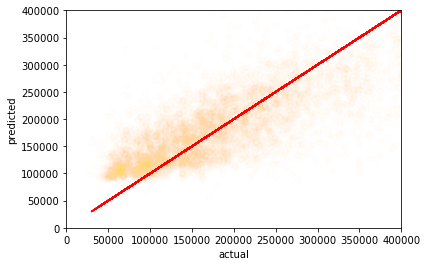

In [18]:
plt.scatter(np.array(y_test), predicted, alpha = .01, c= 'gold')
plt.xlabel('actual')
plt.xlim([0,4e5])
plt.ylim([0,4e5])
plt.ylabel('predicted')
plt.plot(np.array(y_test),np.array(y_test), 'r')

# Great Job!